# Anexos

## P1 suma de dos dados

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

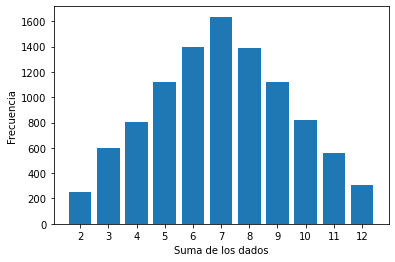

Para la suma de dados igual a 7, la simulación de MC dió una probabilidad de 0.1636; la probabilidad matemática es de 0.1667; se obtuvo un error del 1.8596%.


In [10]:
iteraciones=10000
suma_dict = {
    '2':0,
    '3':0,
    '4':0,
    '5':0,
    '6':0,
    '7':0,
    '8':0,
    '9':0,
    '10':0,
    '11':0,
    '12':0
}
lanzada=0
for i in range(iteraciones):
    dado1 = random.randint(1,6)
    dado2 = random.randint(1,6)
    suma = dado1 + dado2
    suma_dict[str(suma)]+=1
    lanzada+=1
plt.bar(range(len(suma_dict)), list(suma_dict.values()), align='center')
plt.xticks(range(len(suma_dict)), list(suma_dict.keys()))
plt.xlabel("Suma de los dados")
plt.ylabel("Frecuencia")
plt.savefig(f'dados_{iteraciones}.png')
plt.show()
#Probabilidad de tener 7
MC7 = suma_dict['7']/lanzada
P7 = round(6/36,4)
error = round(abs(MC7-P7)/P7*100,4)
print(f'Para la suma de dados igual a 7, la simulación de MC dió una probabilidad de {str(MC7)}; la probabilidad matemática es de {P7}; se obtuvo un error del {error}%.')

## P2 Aproximación de $\pi$

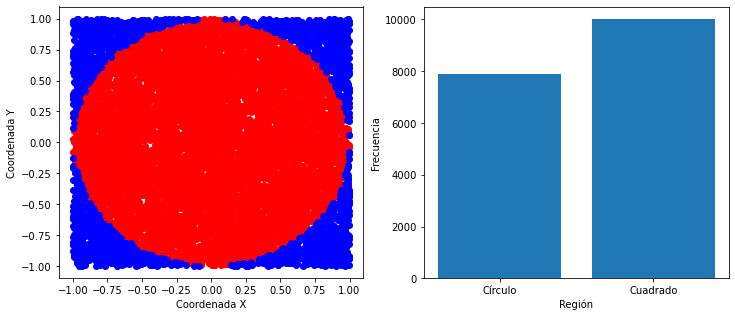

La simulación de MC dió un pi de 3.1564; la probabilidad matemática es de 3.141592653589793; se obtuvo un error del 0.4713%.


In [76]:
iteraciones=10000
puntos_cuad=0
puntos_circ=0
coord_xc=[]
coord_yc=[]
coord_xb=[]
coord_yb=[]
for i in range(iteraciones):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    
    r = (x**2 + y**2)**0.5
    
    if r<=1:
        puntos_circ+=1
        coord_xc.append(x)
        coord_yc.append(y)
    else:
        coord_xb.append(x)
        coord_yb.append(y)
    puntos_cuad+=1
pi = 4*puntos_circ/puntos_cuad
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(coord_xc,coord_yc,'ro')
ax1.plot(coord_xb,coord_yb,'bo')
ax2.bar(['Círculo','Cuadrado'], [puntos_circ,puntos_cuad], align='center')
ax1.set_ylabel("Coordenada Y")
ax1.set_xlabel("Coordenada X")
ax2.set_ylabel("Frecuencia")
ax2.set_xlabel("Región")
plt.savefig(f'dados_{iteraciones}.png')
plt.rcParams['figure.figsize'] = 12,5
plt.savefig(f'pi_{iteraciones}.png')
plt.show()

#Probabilidad de caer en el círculo
MCpi = 4*puntos_circ/iteraciones
error = round(abs(MCpi-np.pi)/np.pi*100,4)
print(f'La simulación de MC dió un pi de {MCpi}; la probabilidad matemática es de {np.pi}; se obtuvo un error del {error}%.')

## P3 Supervivencia de componente

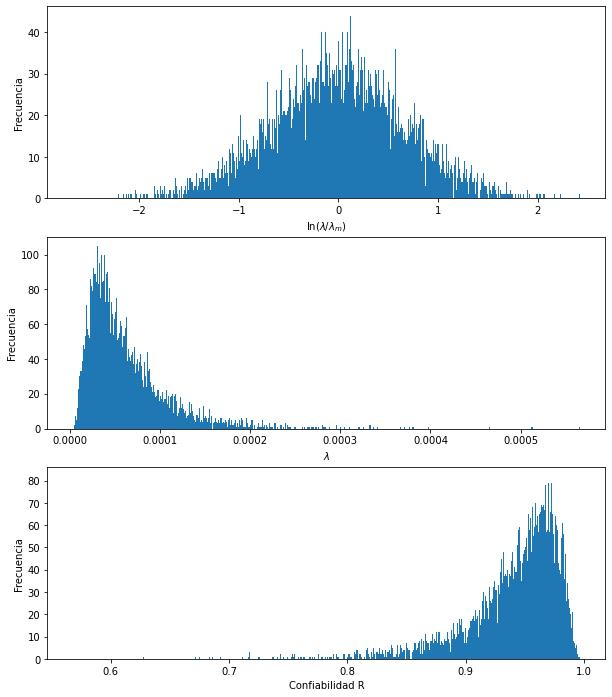

the most frequent bin:(0.965254924459253,0.9656834881459142)
the mode:0.9654692063025836


In [119]:
iteraciones = 10000
lambda_m = 5*10**(-5) #1/hr
sigma = np.log(3)/st.norm.ppf(0.95)
mu = 0
x = np.random.normal(0, sigma, iteraciones)
f_lambda = np.exp(x)*lambda_m
R = np.exp(-f_lambda*1000)

# create the histogram
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.hist(x, bins=int(iteraciones/10))
ax2.hist(f_lambda, bins=int(iteraciones/10))
ax1.set_ylabel("Frecuencia")
ax1.set_xlabel(r"ln($\lambda$/$\lambda_m$)")
ax2.set_ylabel("Frecuencia")
ax2.set_xlabel(r"$\lambda$")
plt.savefig(f'dados_{iteraciones}.png')
plt.rcParams['figure.figsize'] = 12,5
plt.savefig(f'pi_{iteraciones}.png')
n, bins, patches = ax3.hist(R, bins=int(iteraciones/10))
ax3.set_ylabel("Frecuencia")
ax3.set_xlabel("Confiabilidad R")
plt.rcParams['figure.figsize'] = 10,12
plt.savefig(f'R_{iteraciones}.png')
plt.show()

# show the histogram 
plt.show()


mode_index = n.argmax()
# the most frequent bin
print('the most frequent bin:(' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')
# the mode         
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2))
# print('lambda medio: '+ str((bins[mode_index] + bins[mode_index+1])/2*np.exp(1/2*sigma**2)))
plt.show()

In [120]:
R_teo = np.exp(-lambda_m*1000)
moda1 = 0.9585070835474612
moda2 = 0.9524229162459326
moda3 = 0.9654692063025836
error = round(abs(R_teo-moda3)/R_teo*100,4)
error

1.497

In [106]:
np.log(3)/st.norm.ppf(.95)

0.667908846518002